# Computing PageRank

In [1]:
import pandas as pd
import csv
from datetime import datetime, timedelta
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import datetime
from colour import Color
import networkx as nx
import scipy.stats
from notify_run import Notify 
notify = Notify() 

In [2]:
df = pd.read_csv("data/basicbib.tab",  sep='\t') # main dataframe with all the patents
df["n_fcites"] = df["n_fcites"].fillna(0)

C:\Users\DIEGO UNZUETA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_2class = pd.read_csv("data/df_2class_wPR.csv")

In [6]:
df_2class.shape

(46264, 51)

In [5]:
df_melt_2class = pd.read_csv("data/df_2class_melt.csv")
df_melt_2class["issuedate"] = pd.to_datetime(df_melt_2class["issuedate"],errors='coerce').dt.date

In [44]:
df_links = pd.read_csv("data/uscites.tab",  sep='\t')

C:\Users\DIEGO UNZUETA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
# Melt and DF have the same patents
df_2class.shape[0], len(set(df_melt_2class.loc[df_melt_2class["issuedate"] < date(2000, 1,1)]["patent"]))

(46264, 46264)

## Size of Networks

The size of each network shell was computed using the Iridis 5 cluster up to 18 orders. The following code shows how these were computed

In [8]:
len(set(df_melt_424["patent"]) | set(df_melt_424["cited"])) 

132731

In [9]:
# takes long to run: returns 5,658,280
len(set(df_melt_all["patent"]) | set(df_melt_all["cited"])) 

5658280

In [10]:
def get_higher_order(melt):
    return(df_melt_all.loc[(df_melt_all["patent"].isin(melt["patent"].values)) \
              | (df_melt_all["patent"].isin(melt["cited"].values))])

In [11]:
order2 = get_higher_order(df_melt_2class)

In [12]:
order3 = get_higher_order(order2)

In [13]:
order4 = get_higher_order(order3)

In [14]:
order5 = get_higher_order(order4)

In [15]:
order6 = get_higher_order(order5)

In [16]:
order7 = get_higher_order(order6)

In [17]:
order8 = get_higher_order(order7)

In [18]:
order8.shape, order7.shape, order6.shape, order5.shape, order4.shape, order3.shape, order2.shape, df_melt_2class.shape

((7919204, 16),
 (7689772, 16),
 (7186104, 16),
 (6178407, 16),
 (4628556, 16),
 (3006693, 16),
 (1772892, 16),
 (960825, 16))

In [19]:
len(set(order8["patent"]) | set(order8["cited"])) 

2072029

In [20]:
# Order 0 is the patents in class 424/514
# Order 1 is the patents in Order 0 and the patents that cite order 0
# Order 2 is the patents in order 1 and the patents that cite order 1 
# ...

print("Order 0: 104844") #, len(set(df_melt_2class["patent"])))
print("Order 1: 239177") #, len(set(df_melt_2class["patent"]) | set(df_melt_2class["cited"])) )
print("Order 2: 465592") #, len(set(order2["patent"]) | set(order2["cited"])) 
print("Order 3: 844139")
print("Order 4: 1306838")
print("Order 5: 1682972")
print("Order 6: 1906309")
print("Order 7: 2019348")
print("Order 8: 2072029")

print("Full Network: 5658280")

Order 0: 104844
Order 1: 239177
Order 2: 465592
Order 3: 844139
Order 4: 1306838
Order 5: 1682972
Order 6: 1906309
Order 7: 2019348
Order 8: 2072029
Full Network: 5658280


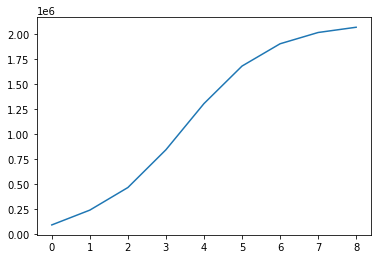

In [52]:
plt.plot([90827,239177,465592,844139,1306838, 1682972, 1906309, 2019348, 2072029])

Text(0.5, 0, 'Order of shell around class 424 and 514 patents')

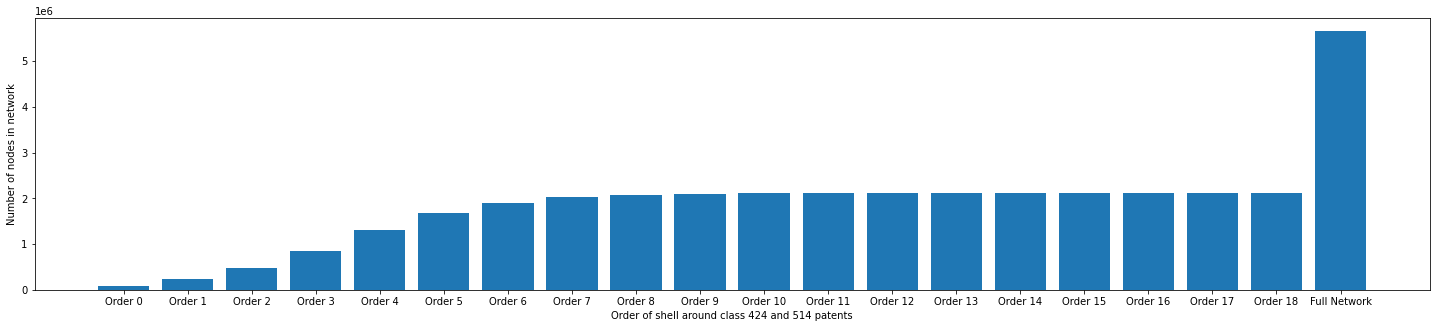

In [22]:
plt.figure(figsize = (25, 5))
plt.bar(["Order {}".format(i) for i in range(19)] + ["Full Network"], \
        [90827,239177,465592,844139,1306838, 1682972, 1906309, 2019348, 2072029, \
         2096271, 2107569, 2113127, 2116194, 2118206, 2119519, 2120345, 2120895, \
         2121203, 2121320, 5658280])

plt.ylabel("Number of nodes in network")
plt.xlabel("Order of shell around class 424 and 514 patents")

## Computing PageRank

In [22]:
# The issuedate is in ISO format but I want it in DateTime
df["issuedate"] = pd.to_datetime(df["issuedate"]).dt.date

In [23]:

df_2class_full = df.loc[((df["class"].values == "424") \
               |    (df["class"].values == 424)   \
               |    (df["class"].values == "514") \
               |    (df["class"].values == 514)    )  \
               &    (df["issuedate"] > date(1990, 1,1) )\
               &    (df["issuedate"] < date(2010,1,1))]

In [58]:
order0 = df_melt_2class.loc[df_melt_2class["cited"].isin(set(df_melt_2class["patent"]))][["patent", "cited"]]

In [63]:
missing = []
s = set(order0["patent"])
for i in set(df_melt_2class["patent"]):
    if i not in s:
        missing.append(i)

In [5]:
df_melt_2class.shape

(960825, 16)

In [6]:
G = nx.from_pandas_edgelist(df_melt_2class , source = "patent", target = "cited")

In [68]:
for i in missing:
    G.add_node(i)

In [69]:
G.number_of_nodes()

104844

In [7]:
pr = nx.pagerank(G, alpha = 0.85)
notify.send('PageRank Done') 

In [71]:
len(pr)#, len(set(order0["patent"]) | set(order0["cited"])) 

104844

## Loading Computed PageRank

In [50]:
import pickle

In [66]:
with open('PageRankpickles/order10.pkl', 'rb') as handle:
    a = pickle.load(handle)

In [67]:
pr = a

In [75]:
pr_index = np.asarray(list(pr.keys())) # keys of patents
pr_values = np.asarray(list(pr.values())) #pagerank importance of patents

In [77]:
# the PageRank value of the ten most cited patents
ten_most_inlinks = [pr[i] for i in df_2class.sort_values("inl_by_assignee_424")[-10:]["patent"].values]

In [68]:
df_2class["pagerank_order10"] = [pr[i] for i in df_2class["patent"].values]

In [20]:
ten_most_pagerank = df_2class.sort_values("pagerank_order2")[-10:]["inl_by_assignee_424"].values

In [21]:
red = Color("orange")
colors = list(red.range_to(Color("darkgreen"),10))

Text(0.5, 0, 'Log of PageRank')

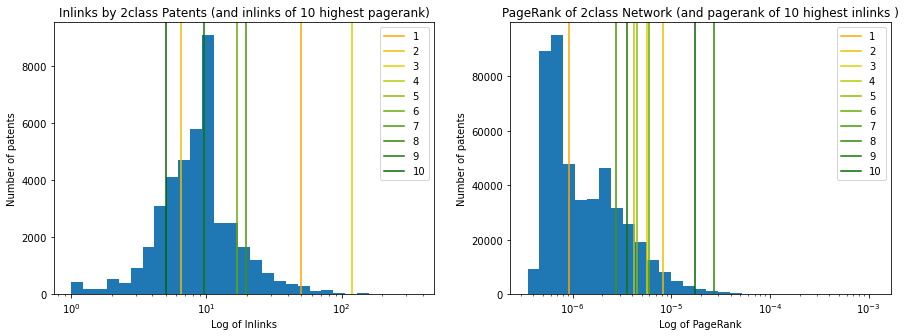

In [22]:
_, ax = plt.subplots(1,2, figsize = (15, 5))

MIN = df_2class["inl_by_assignee_424"].min()
MAX = df_2class["inl_by_assignee_424"].max()
ax[0].hist(sorted(df_2class["inl_by_assignee_424"]),bins = 10 ** np.linspace(np.log10(1), np.log10(MAX), 30))
ax[0].set_xscale("log")
for index, i in enumerate(ten_most_pagerank):
    ax[0].axvline(i, c = colors[index].hex, label = index+1)
    
ax[0].legend()
ax[0].set_title("Inlinks by 2class Patents (and inlinks of 10 highest pagerank)")
ax[0].set_xscale("log")
ax[0].set_ylabel("Number of patents")
ax[0].set_xlabel("Log of Inlinks")

MIN = pr_values.min()
MAX = pr_values.max()
ax[1].hist(sorted(pr_values), bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 30))
ax[1].set_xscale("log")
for index, i in enumerate(ten_most_inlinks):
    ax[1].axvline(i, c = colors[index].hex, label = index+1)
    
ax[1].legend()
# ax[1].hist(sorted(pr_values), bins = 1000)
ax[1].set_title("PageRank of 2class Network (and pagerank of 10 highest inlinks )")
ax[1].set_xscale("log")
ax[1].set_ylabel("Number of patents")
ax[1].set_xlabel("Log of PageRank")

Text(0.5, 0, 'Log of PageRank')

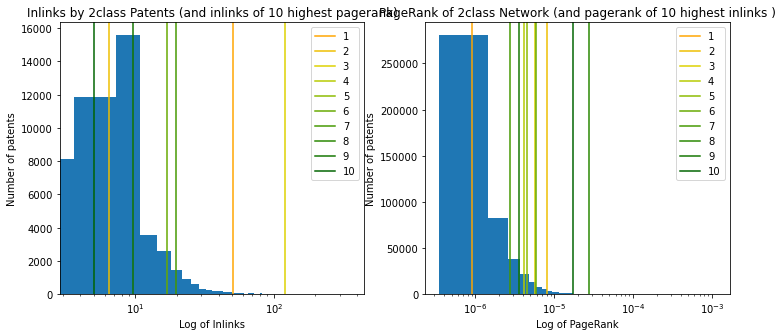

In [23]:
_, ax = plt.subplots(1,2, figsize = (12, 5))

ax[0].hist(sorted(df_2class["inl_by_assignee_424"]), bins = 100)
ax[0].set_xscale("log")
for index, i in enumerate(ten_most_pagerank):
    ax[0].axvline(i, c = colors[index].hex, label = index+1)
    
ax[0].legend()
ax[0].set_title("Inlinks by 2class Patents (and inlinks of 10 highest pagerank)")
ax[0].set_xscale("log")
ax[0].set_ylabel("Number of patents")
ax[0].set_xlabel("Log of Inlinks")

ax[1].hist(sorted(pr_values), bins = 1000)
ax[1].set_xscale("log")
for index, i in enumerate(ten_most_inlinks):
    ax[1].axvline(i, c = colors[index].hex, label = index+1)
    
ax[1].legend()
# ax[1].hist(sorted(pr_values), bins = 1000)
ax[1].set_title("PageRank of 2class Network (and pagerank of 10 highest inlinks )")
ax[1].set_xscale("log")
ax[1].set_ylabel("Number of patents")
ax[1].set_xlabel("Log of PageRank")

In [14]:
l = ["n_claims", "n_bcites", "n_nplcites", "median_age_cited",\
                               "count_by_assignee_all","count_by_assignee_class",\
                               "inl_by_assignee_all", "inl_by_assignee_424", "inl_by_assignee_other",\
                               "herfindahl_cited_424subclass", "herfindahl_cited_class"]

In [30]:
# df_424.corr()
df_2class.corr(method = "spearman")[["pagerank_order0", "pagerank_order1", "pagerank_order2", "pagerank_order3", \
                                     "pagerank_order4", "pagerank_order5", "pagerank_order6",  \
                                     "pagerank_order7","pagerank_order8",\
                                     "inlinks_all", "inlinks_class", 'FC3', 'FC5', 'FC10']]\
                                        .loc[l].style.background_gradient(cmap='coolwarm')

,pagerank_order0,pagerank_order1,pagerank_order2,pagerank_order3,pagerank_order4,pagerank_order5,pagerank_order6,pagerank_order7,pagerank_order8,inlinks_all,inlinks_class,FC3,FC5,FC10
n_claims,0.181420,0.183375,0.176081,0.166128,0.123527,0.123481,0.123579,0.123596,0.123620,0.190163,0.171783,0.140820,0.185471,0.204175
n_bcites,0.331307,0.596245,0.505194,0.540396,0.271382,0.269624,0.269035,0.268730,0.268635,0.209642,0.185878,0.170736,0.210017,0.225146
n_nplcites,0.129915,0.152407,0.159986,0.187047,0.133204,0.133719,0.133811,0.133851,0.133882,0.103638,0.092327,0.050255,0.081538,0.116382
median_age_cited,-0.014071,-0.010144,0.001832,-0.000624,0.024887,0.024976,0.025028,0.025176,0.025141,-0.001255,0.000527,-0.001723,-0.003275,-0.006344
count_by_assignee_all,-0.034501,-0.034018,-0.038022,-0.026050,-0.034936,-0.035099,-0.035074,-0.035030,-0.035014,-0.077676,-0.064083,-0.009778,-0.042467,-0.075966
count_by_assignee_class,-0.048440,-0.087848,-0.079456,-0.052716,-0.049895,-0.049552,-0.049416,-0.049335,-0.049317,-0.129696,-0.082951,-0.045621,-0.091804,-0.131632
inl_by_assignee_all,0.268059,0.265177,0.259099,0.225787,0.158938,0.158940,0.159127,0.159091,0.159128,0.377583,0.327237,0.206640,0.296648,0.371989
inl_by_assignee_424,0.180065,0.134796,0.142641,0.136357,0.093215,0.093676,0.093946,0.094062,0.094111,0.225425,0.221048,0.122878,0.174957,0.219062
inl_by_assignee_other,0.201609,0.212391,0.203962,0.174865,0.117719,0.117625,0.117754,0.117684,0.117712,0.297977,0.251439,0.165171,0.236716,0.295148
herfindahl_cited_424subclass,0.054270,0.019780,-0.029906,-0.008461,-0.125654,-0.126298,-0.126589,-0.126756,-0.126786,0.031412,0.031493,0.021078,0.033816,0.036559


## More Analysis

In [33]:
df_2class.corr(method = "spearman")[["inlinks_all", "inlinks_class", 'FC3', 'FC5', 'FC10']]\
                                .loc[["pagerank_order0", "pagerank_order1", "pagerank_order2", "pagerank_order3", \
                                     "pagerank_order4", "pagerank_order5", "pagerank_order6",\
                                     "pagerank_order7", "pagerank_order8",]].style.background_gradient(cmap='coolwarm')

,inlinks_all,inlinks_class,FC3,FC5,FC10
pagerank_order0,0.753931,0.821244,0.460897,0.610929,0.737147
pagerank_order1,0.605962,0.605889,0.368700,0.485005,0.585483
pagerank_order2,0.635798,0.634184,0.387475,0.509741,0.614163
pagerank_order3,0.562559,0.564842,0.355493,0.459373,0.544683
pagerank_order4,0.492857,0.508421,0.319635,0.411239,0.478481
pagerank_order5,0.493996,0.510046,0.320347,0.412198,0.479586
pagerank_order6,0.494453,0.510630,0.320727,0.412627,0.480026
pagerank_order7,0.494599,0.510829,0.320858,0.412759,0.480171
pagerank_order8,0.494684,0.510941,0.320935,0.412859,0.480260


In [47]:
def plot_orders(log = True):
    _, ax = plt.subplots(1,2, figsize = (10, 5))
    bin_nums = 10
    
    y_var = "FC10"
    
    for i in range(2):
        if i == 1:
                ax[i].set_title("Normalised Page-Rank")

        else:
            ax[i].set_title("Page-Rank")
        ax[i].set_xlabel("In-links")
        ax[i].set_ylabel("PageRank")
        
        if log == False:
            bins=np.linspace(min(df_2class[y_var]), max(df_2class[y_var]), bin_nums)
        else:
            bins = np.logspace(min(df_2class[y_var]), np.log10(max(df_2class[y_var])), bin_nums)
        
        index = np.digitize(df_2class[y_var], bins= bins)
        
        for j in [0, 12]:#range(13):#range(13)[::2]:

            group = df_2class["pagerank_order" + str(j)].groupby(index)

            if i == 1:
                den = df_2class["pagerank_order" + str(j)].mean()
            else:
                den = 1
            
#             print(j)
            if log == True:
                ax[i].errorbar(bins, group.mean()[:-1]/den, yerr =  group.std()[:-1]/den, fmt = "o", label = "Order " + str(j), c = "C" + str(int(j)))
                ax[i].plot(bins, group.mean()[:-1]/den, c = "C" + str(int(j)))
                ax[i].set_xscale("log")
                
            else:
                print(bins.shape, group.mean().shape)
                ax[i].errorbar(bins[:-1], group.mean()/den, yerr =  group.std()/den, fmt = "o", label = "Order " + str(j), c = "C" + str(int(j)))
                ax[i].plot(bins[:-1], group.mean()/den, c = "C" +  str(int(j)))
                
        index = np.digitize(df_2class[y_var], bins= bins)
        group = df_2class["sliding_window_12"].groupby(index)
         
#         print(len(bins), group.mean().shape)
#         ax[i].scatter(df_2class["FC10"], df_2class["sliding_window_12"])
    
        if log == True:
            
            ax[i].errorbar(bins, group.mean()[:-1], yerr =  group.std()[:-1], fmt = "o", label = "Sliding Window", c = "red")
            ax[i].plot(bins, group.mean()[:-1], c = "red")
        
        if log == False:
            ax[i].errorbar(bins[:-1], group.mean(), yerr =  group.std(), fmt = "o", label = "Sliding Window", c = "red")
            ax[i].plot(bins[:-1], group.mean(), c = "red")
        
#         index = np.digitize(df_2class[y_var], bins= bins)
#         group = df_2class["sliding_window_12"].groupby(index)
#         ax[i].errorbar(bins, group.mean()[:-1], yerr =  group.std()[:-1], fmt = "o", label = "Sliding Window 12", c = "black")
#         ax[i].plot(bins, group.mean()[:-1], c = "black")
        
        ax[i].legend()

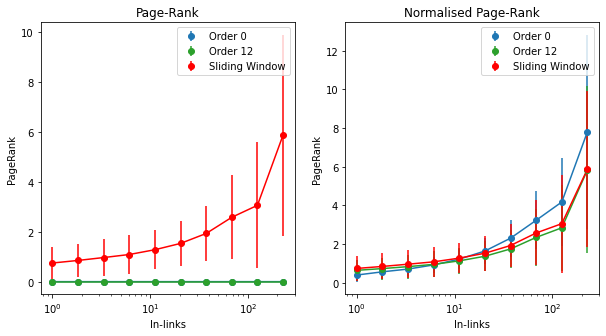

In [48]:
plot_orders()

(10,) (9,)
(10,) (9,)
(10,) (9,)
(10,) (9,)


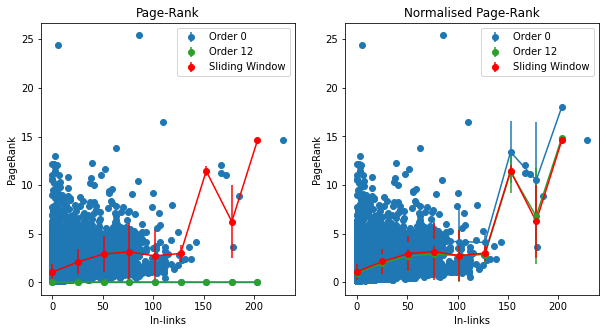

In [42]:
plot_orders(log = False)

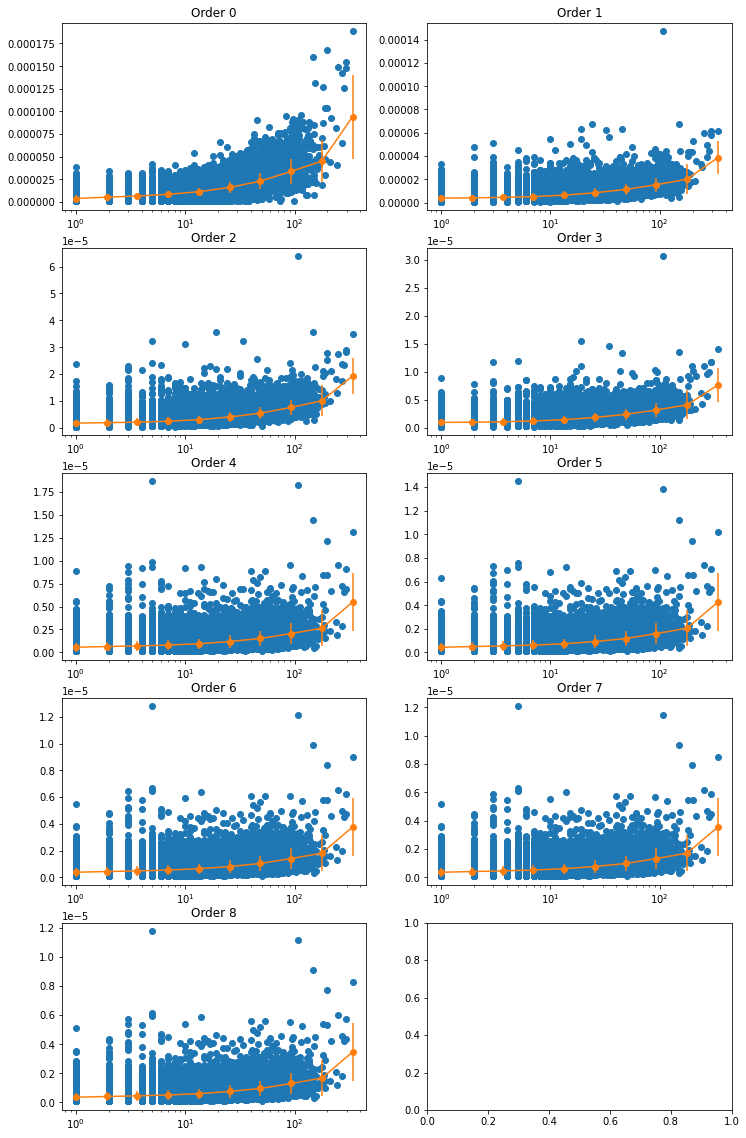

In [32]:
_, ax = plt.subplots(5,2, figsize = (12, 20))
bin_nums = 10

for i in range(9):
    ax[i//2][i%2].scatter(df_2class["inlinks_all"], df_2class["pagerank_order" + str(i)])
    ax[i//2][i%2].set_title("Order " + str(i))

    bins=np.logspace(min(df_2class["inlinks_all"]), np.log10(max(df_2class["inlinks_all"])), bin_nums)    
    index = np.digitize(df_2class["inlinks_all"], bins= bins)        
    group = df_2class["pagerank_order" + str(i)].groupby(index)
    
    ax[i//2][i%2].errorbar(bins, group.mean()[:-1], yerr =  group.std()[:-1], fmt = "o", c = "C1")
    ax[i//2][i%2].plot(bins, group.mean()[:-1], c = "C1")
    ax[i//2][i%2].set_xscale("log")

In [39]:
rankings = []

for i in range(13):
#     print(i)
    rankings.append(np.argsort(df_2class["pagerank_order" + str(i)]))
    
df_ranks = pd.DataFrame(np.asarray(rankings).T, columns = ["order{}".format(i) for i in range(13)]) #order of rankings

In [40]:
df_ranks = df_ranks[-1000:]

In [41]:
(df_ranks["order11"] == df_ranks["order12"]).sum()/df_ranks.shape[0]

0.996

In [81]:
(df_ranks["order10"] == df_ranks["order11"]).sum()/df_ranks.shape[0]

0.6841388552654332

Text(0.5, 1.0, 'Spearman for rankings of PageRank compared to Order 0')

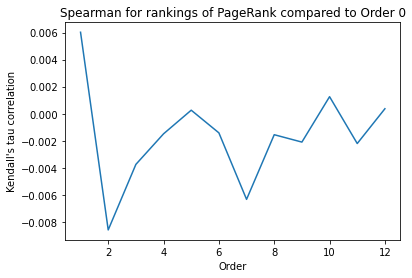

In [84]:
plt.plot(range(1, 13), \
         [scipy.stats.spearmanr(df_ranks["order0"], df_ranks["order{}".format(i)])[0] for i in range(1, 13)])
plt.ylabel("Kendall's tau correlation")
plt.xlabel("Order")
plt.title("Spearman for rankings of PageRank compared to Order 0")

Text(0.5, 1.0, 'Kendall tau for rankings of PageRank compared to Order 0')

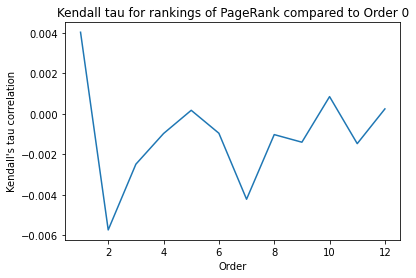

In [85]:
plt.plot(range(1, 13), \
         [scipy.stats.kendalltau(df_ranks["order0"], df_ranks["order{}".format(i)])[0] for i in range(1, 13)])
plt.ylabel("Kendall's tau correlation")
plt.xlabel("Order")
plt.title("Kendall tau for rankings of PageRank compared to Order 0")

Text(0.5, 0, 'Shell order around patents in classes 424 and 514')

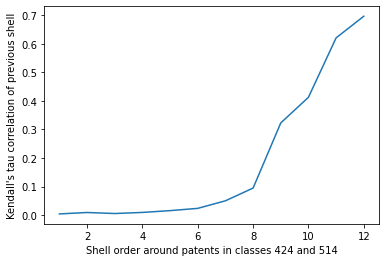

In [26]:
"""
Higher Kendall tau means higher similarity between rankings, 
the first few orders are different from eachother, they have lower kendall tau, 
then the rankings stop changing so much, (furthe citations are less important)
"""

plt.plot(range(1, 13), \
         [scipy.stats.kendalltau(df_ranks["order{}".format(i-1)], df_ranks["order{}".format(i)])[0] for i in range(1, 13)])


# print([scipy.stats.kendalltau(df_ranks["order{}".format(i-1)], df_ranks["order{}".format(i)])[0] for i in range(1, 13)])
# print([scipy.stats.kendalltau(df_ranks["order{}".format(i-1)], df_ranks["order{}".format(i)])[1] for i in range(1, 13)])

plt.ylabel("Kendall's tau correlation of previous shell")
plt.xlabel("Shell order around patents in classes 424 and 514")
# plt.title("Kendall tau for rankings of PageRank compared to the previous order")

Text(0.5, 1.0, 'spearman for rankings of PageRank compared to the previous order')

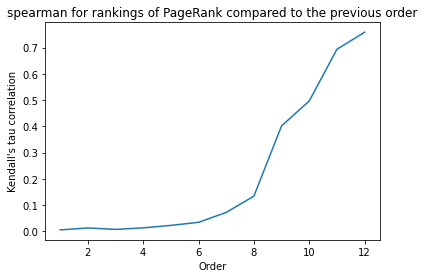

In [89]:
"""
Higher Kendall tau means higher similarity between rankings, 
the first few orders are different from eachother, they have lower kendall tau, 
then the rankings stop changing so much, (furthe citations are less important)
"""

plt.plot(range(1, 13), \
         [scipy.stats.spearmanr(df_ranks["order{}".format(i-1)], df_ranks["order{}".format(i)])[0] for i in range(1, 13)])

plt.ylabel("Kendall's tau correlation")
plt.xlabel("Order")
plt.title("spearman for rankings of PageRank compared to the previous order")